In [172]:
import pandas as pd
import matplotlib as plt
from matplotlib import figure, pyplot
from statistics import median, mean
import numpy as np
import scipy.stats as st
from numpy import nan
import math

In [173]:
# Load in feature
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv")
erodedFeatures = pd.read_csv(r"/Users/ilanadeutsch/Desktop/featuresEroded.csv")

# Intialize variable
all_feature_vals = []
results = []

In [174]:
# Iterate through all features
for count, feature in enumerate(features):
    
    # Add all feature values (eroded and non eroded) to a list
    all_feature_vals.extend(features[str(feature)])
    all_feature_vals.extend(erodedFeatures[str(feature)])

    # Calculate bias
    bias = features[str(feature)] - erodedFeatures[str(feature)]

    # Eliminate NaN values
    all_feature_vals = [x for x in all_feature_vals if not(math.isnan(x))]
    bias = [x for x in bias if not(math.isnan(x))]

    # Find mean feature val
    mean_feature_val = mean(all_feature_vals)

    # Calculate norm bias
    norm_bias = abs(mean(bias) / mean_feature_val)

    # Calculate CI
    mean_bias = mean(bias)
    sd = np.std(bias)
    lower_lim = mean_bias - sd*1.96
    upper_lim = mean_bias + sd*1.96

    # Calculate normalized range of agreement
    nRoA = ((upper_lim - lower_lim) / abs(mean_feature_val)) 
    results.append([feature, nRoA, norm_bias])

    # Reset feature value list
    all_feature_vals = []

df = pd.DataFrame(results)

In [175]:
# NOTE: Make sure to reset cells before this before rerunning

# Set value cutoffs
RNoA_cutoff = 3
bias_cutoff = 0.5

# Intialize list of dropped features
dropped_RNoA_features = []
dropped_bias_features =[]

# Add features below cutoff values to a list
for featNum, feature in enumerate(df[0]):
    if df.iloc[featNum,1] > RNoA_cutoff:
        dropped_RNoA_features.append(feature)  
    elif df.iloc[featNum,2] > bias_cutoff:
        dropped_bias_features.append(feature)

# Remove features below specified cutoff values
df = df[abs(df[1]) < RNoA_cutoff]
df = df[abs(df[2]) < bias_cutoff]

overlap = [feature for feature in dropped_RNoA_features if feature in dropped_bias_features]

# Display dropped features
print(f"Dropped RNoA features: {dropped_RNoA_features}")
print(f"Total = {len(dropped_RNoA_features)}")
print("\n")
print(f"Dropped bias features: {dropped_bias_features}")
print(f"Total = {len(dropped_bias_features)}")
print("\n")
print(f"Overlap: {overlap}")
print(f"Total = {len(overlap)}")

Dropped RNoA features: ['original_firstorder_10Percentile', 'original_firstorder_Kurtosis', 'original_firstorder_Skewness', 'original_firstorder_Variance', 'original_glcm_ClusterShade', 'original_glcm_Contrast', 'original_glcm_DifferenceAverage', 'original_glcm_InverseVariance', 'original_gldm_DependenceNonUniformity', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glrlm_RunLengthNonUniformity', 'original_glrlm_RunVariance', 'original_glszm_GrayLevelNonUniformity', 'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_SizeZoneNonUniformity', 'original_glszm_ZonePercentage', 'original_glszm_ZoneVariance', 'original_ngtdm_Busyness', 'original_ngtdm_Coarseness', 'original_ngtdm_Complexity', 'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'GLDZM_LGLE', 'GLDZM_SDLGLE', 'GLDZM_LDLGLE', 'GLDZM_GLV', 'GLDZ

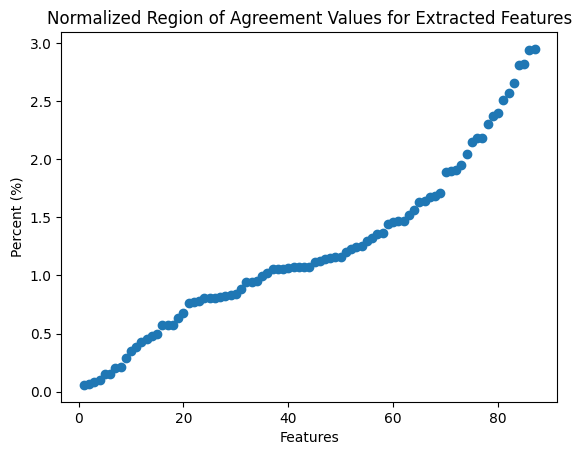

In [176]:
# Sort data frame by nRoA value and export values
sorteddf= df.sort_values(by = 1)
sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_by_nRoA.xlsx")

# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[0]):
    sorteddf.iloc[entryNum,0] = entryNum

# Plot nRoA values of each feature from smallest to largest
plt.pyplot.scatter(x= sorteddf.iloc[1:135,0],y = sorteddf.iloc[1:135,1])
plt.pyplot.title("Normalized Region of Agreement Values for Extracted Features")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("Percent (%)")
plt.pyplot.show()

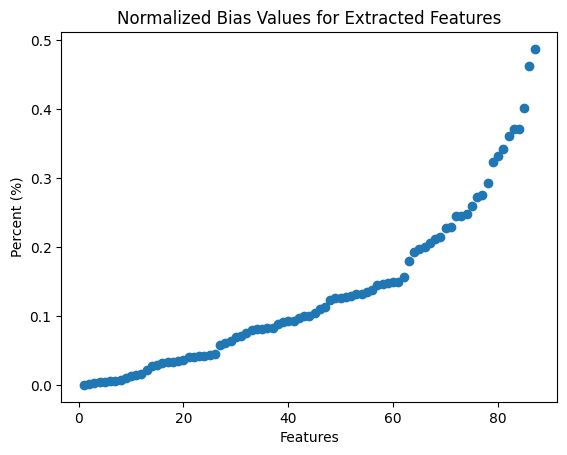

In [177]:
# Sort data frame by bias value and export values
sorteddf=df.sort_values(by = 2)
sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_by_bias.xlsx")

# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[0]):
    sorteddf.iloc[entryNum,0] = entryNum

# Plot bias values of each feature from smalles to largest
plt.pyplot.scatter(x= sorteddf.iloc[1:135,0],y = sorteddf.iloc[1:135,2])
plt.pyplot.title("Normalized Bias Values for Extracted Features")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("Percent (%)")
plt.pyplot.show()

In [178]:
# Make Bland-Altman plot of one feature
sm.graphics.mean_diff_plot(features['original_firstorder_10Percentile'], erodedFeatures['original_firstorder_10Percentile'])

NameError: name 'sm' is not defined